In [1]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Stats test
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import FastICA

# Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

df = pd.read_csv('men_2026_teams_training.csv')
print(df.shape)
df.head()

(748, 134)


,Unnamed: 0,team_id,year,team,region,seed,finish,weekend,conference,kenpom_id,...,def_free_throw_advantage,def_block_efficiency,def_experience_impact,four_factors_composite,def_four_factors_composite,elite_outcome_probability,shooting_variance_resilience,lineup_depth_quality,def_lineup_depth_quality,offense_defense_balance
0,0,2015 Duke,2015,Duke,South,1,Champion,3,ACC,2015 Duke,...,-494.7800,10.2910,13.3560,57.0700,43.0000,4,67.5202,-6.8000,-6.3000,9.3273
1,1,2015 Kentucky,2015,Kentucky,Midwest,1,Final Four,3,SEC,2015 Kentucky,...,-768.3600,5.1193,16.4250,56.2700,46.1500,2,67.0140,-6.4000,-5.2000,7.9395
2,2,2015 Michigan St.,2015,Michigan St.,East,7,Final Four,3,Big 10,2015 Michigan St.,...,-256.1800,7.0222,23.8650,53.7500,40.5150,2,69.5860,-6.3000,-5.7000,8.5504
3,3,2015 Wisconsin,2015,Wisconsin,West,1,Runner Up,3,Big 10,2015 Wisconsin,...,-199.3700,10.2271,38.0640,55.4600,42.0700,2,70.5360,-7.7000,-9.5000,9.3840
4,4,2015 Arizona,2015,Arizona,West,2,Elite Eight,2,Pac 12,2015 Arizona,...,-1330.3300,9.1854,28.8600,56.1500,41.5700,1,70.1359,-3.1000,-5.3000,7.8627


In [2]:
df.columns.to_list()

['Unnamed: 0',
 'team_id',
 'year',
 'team',
 'region',
 'seed',
 'finish',
 'weekend',
 'conference',
 'kenpom_id',
 'torvik_id',
 '5man_prpg!',
 '5man_dprpg',
 '5man_bpm',
 '5man_obpm',
 '5man_dbpm',
 '3man_prpg!',
 '3man_dprpg',
 '3man_bpm',
 '3man_obpm',
 '3man_dbpm',
 'kenpom_off',
 'kenpom_def',
 'kenpom_rtg',
 'size',
 'height',
 'experience',
 'bench',
 'pts_from_5',
 'pts_from_4',
 'pts_from_3',
 'pts_from_2',
 'pts_from_1',
 'or_from_5',
 'or_from_4',
 'or_from_3',
 'or_from_2',
 'or_from_1',
 'dr_from_5',
 'dr_from_4',
 'dr_from_3',
 'dr_from_2',
 'dr_from_1',
 'wab',
 'torvik_off',
 'torvik_def',
 'torvik_rtg',
 'efg%',
 'efgd%',
 'ftr',
 'ftrd',
 'tor',
 'tord',
 'orb%',
 'drb%',
 'raw_tempo',
 '2p%',
 '2p%d',
 '3p%',
 '3p%d',
 'blk%',
 'blked%',
 'ast%',
 'ast%d',
 '3pr',
 '3prd',
 'adj_tempo',
 'ft%',
 'ft%d',
 'off_dunk_fg%',
 'off_dunk_share',
 'def_dunk_fg%',
 'def_dunk_share',
 'off_close2_fg%',
 'off_close2_share',
 'def_close2_fg%',
 'def_close2_share',
 'off_far2_

In [3]:
X = df[['5man_prpg!',
 '5man_dprpg',
 '5man_bpm',
 '5man_obpm',
 '5man_dbpm',
 '3man_prpg!',
 '3man_dprpg',
 '3man_bpm',
 '3man_obpm',
 '3man_dbpm',
 'kenpom_off',
 'kenpom_def',
 'kenpom_rtg',
 'size',
 'height',
 'experience',
 'bench',
 'pts_from_5',
 'pts_from_4',
 'pts_from_3',
 'pts_from_2',
 'pts_from_1',
 'or_from_5',
 'or_from_4',
 'or_from_3',
 'or_from_2',
 'or_from_1',
 'dr_from_5',
 'dr_from_4',
 'dr_from_3',
 'dr_from_2',
 'dr_from_1',
 'wab',
 'torvik_off',
 'torvik_def',
 'torvik_rtg',
 'efg%',
 'efgd%',
 'ftr',
 'ftrd',
 'tor',
 'tord',
 'orb%',
 'drb%',
 'raw_tempo',
 '2p%',
 '2p%d',
 '3p%',
 '3p%d',
 'blk%',
 'blked%',
 'ast%',
 'ast%d',
 '3pr',
 '3prd',
 'adj_tempo',
 'ft%',
 'ft%d',
 'off_dunk_fg%',
 'off_dunk_share',
 'def_dunk_fg%',
 'def_dunk_share',
 'off_close2_fg%',
 'off_close2_share',
 'def_close2_fg%',
 'def_close2_share',
 'off_far2_fg%',
 'off_far2_share',
 'def_far2_fg%',
 'def_far2_share',
 'off_3pt_fg%',
 'off_3pt_share',
 'def_3pt_fg%',
 'def_3pt_share',
 'net_efg_margin',
 'net_turnover_margin',
 'net_rebounding_margin',
 'net_ftr_margin',
 'def_net_efg_margin',
 'def_net_turnover_margin',
 'def_net_rebounding_margin',
 'def_net_ftr_margin',
 'rim_efficiency',
 'perimeter_efficiency',
 'three_point_volume_efficiency',
 'shot_quality_variance',
 'def_rim_efficiency',
 'def_perimeter_efficiency',
 'def_three_point_volume_efficiency',
 'def_shot_quality_variance',
 'rim_to_three_ratio',
 'mid_range_reliance',
 'paint_touch_rate',
 'def_rim_to_three_ratio',
 'def_mid_range_reliance',
 'def_paint_touch_rate',
 'top5_scoring_concentration',
 'top5_rebounding_concentration',
 'top5_def_rebounding_concentration',
 'bench_scoring_ratio',
 'rotation_balance',
 'tempo_advantage',
 'effective_possession_rate',
 'def_effective_possession_rate',
 'offensive_versatility_score',
 'assist_to_usage_ratio',
 'defensive_versatility_score',
 'def_assist_suppression',
 'size_speed_index',
 'def_size_speed_index',
 'free_throw_advantage',
 'block_efficiency',
 'experience_weighted_production',
 'def_free_throw_advantage',
 'def_block_efficiency',
 'def_experience_impact',
 'four_factors_composite',
 'def_four_factors_composite',
 'elite_outcome_probability',
 'shooting_variance_resilience',
 'lineup_depth_quality',
 'def_lineup_depth_quality',
 'offense_defense_balance']]
y = df['weekend']

### I. Feature Selection

In [4]:
# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,5man_prpg!,88.2335,0.0000,0.1525
1,5man_dprpg,73.4554,0.0000,0.1045
2,5man_bpm,124.9795,0.0000,0.1776
3,5man_obpm,88.7560,0.0000,0.1090
4,5man_dbpm,83.1833,0.0000,0.1417
5,3man_prpg!,67.0472,0.0000,0.0564
6,3man_dprpg,61.5685,0.0000,0.1025
7,3man_bpm,106.9802,0.0000,0.1358
8,3man_obpm,67.4275,0.0000,0.1119
9,3man_dbpm,55.8046,0.0000,0.0735


In [5]:
feature_df = stats_df[stats_df['mutual_info'] > 0]
feature_df

,feature,f_values,p_values,mutual_info
0,5man_prpg!,88.2335,0.0000,0.1525
1,5man_dprpg,73.4554,0.0000,0.1045
2,5man_bpm,124.9795,0.0000,0.1776
3,5man_obpm,88.7560,0.0000,0.1090
4,5man_dbpm,83.1833,0.0000,0.1417
5,3man_prpg!,67.0472,0.0000,0.0564
6,3man_dprpg,61.5685,0.0000,0.1025
7,3man_bpm,106.9802,0.0000,0.1358
8,3man_obpm,67.4275,0.0000,0.1119
9,3man_dbpm,55.8046,0.0000,0.0735


In [6]:
feature_df = feature_df[feature_df['p_values'] < .05]
feature_df.sort_values(by='f_values', ascending=False)

,feature,f_values,p_values,mutual_info
2,5man_bpm,124.9795,0.0000,0.1776
32,wab,122.2082,0.0000,0.1635
12,kenpom_rtg,120.9910,0.0000,0.1784
7,3man_bpm,106.9802,0.0000,0.1358
3,5man_obpm,88.7560,0.0000,0.1090
0,5man_prpg!,88.2335,0.0000,0.1525
33,torvik_off,87.8990,0.0000,0.1375
10,kenpom_off,85.5570,0.0000,0.0986
4,5man_dbpm,83.1833,0.0000,0.1417
1,5man_dprpg,73.4554,0.0000,0.1045


In [7]:
feature_df = feature_df[feature_df['f_values'] > 5]
feature_df.sort_values(by='f_values', ascending=False)

,feature,f_values,p_values,mutual_info
2,5man_bpm,124.9795,0.0000,0.1776
32,wab,122.2082,0.0000,0.1635
12,kenpom_rtg,120.9910,0.0000,0.1784
7,3man_bpm,106.9802,0.0000,0.1358
3,5man_obpm,88.7560,0.0000,0.1090
0,5man_prpg!,88.2335,0.0000,0.1525
33,torvik_off,87.8990,0.0000,0.1375
10,kenpom_off,85.5570,0.0000,0.0986
4,5man_dbpm,83.1833,0.0000,0.1417
1,5man_dprpg,73.4554,0.0000,0.1045


In [8]:
feature_df.sort_values(by='mutual_info', ascending=False)

,feature,f_values,p_values,mutual_info
35,torvik_rtg,67.1632,0.0000,0.1862
12,kenpom_rtg,120.9910,0.0000,0.1784
2,5man_bpm,124.9795,0.0000,0.1776
32,wab,122.2082,0.0000,0.1635
0,5man_prpg!,88.2335,0.0000,0.1525
4,5man_dbpm,83.1833,0.0000,0.1417
33,torvik_off,87.8990,0.0000,0.1375
7,3man_bpm,106.9802,0.0000,0.1358
8,3man_obpm,67.4275,0.0000,0.1119
3,5man_obpm,88.7560,0.0000,0.1090


In [9]:
feature_df['feature'].to_list()

['5man_prpg!',
 '5man_dprpg',
 '5man_bpm',
 '5man_obpm',
 '5man_dbpm',
 '3man_prpg!',
 '3man_dprpg',
 '3man_bpm',
 '3man_obpm',
 '3man_dbpm',
 'kenpom_off',
 'kenpom_def',
 'kenpom_rtg',
 'size',
 'height',
 'dr_from_5',
 'wab',
 'torvik_off',
 'torvik_def',
 'torvik_rtg',
 'efg%',
 'efgd%',
 'orb%',
 '2p%',
 '2p%d',
 '3p%d',
 'blk%',
 'off_dunk_share',
 'def_dunk_share',
 'off_close2_fg%',
 'def_close2_share',
 'off_3pt_fg%',
 'def_3pt_fg%',
 'net_rebounding_margin',
 'def_net_rebounding_margin',
 'rim_efficiency',
 'def_perimeter_efficiency',
 'def_mid_range_reliance',
 'effective_possession_rate',
 'size_speed_index',
 'def_size_speed_index',
 'block_efficiency',
 'experience_weighted_production',
 'def_block_efficiency',
 'def_experience_impact',
 'four_factors_composite',
 'def_four_factors_composite',
 'elite_outcome_probability',
 'lineup_depth_quality',
 'def_lineup_depth_quality']

In [10]:
vars_df = df[['5man_prpg!',
 '5man_dprpg',
 '5man_bpm',
 '5man_obpm',
 '5man_dbpm',
 '3man_prpg!',
 '3man_dprpg',
 '3man_bpm',
 '3man_obpm',
 '3man_dbpm',
 'kenpom_off',
 'kenpom_def',
 'kenpom_rtg',
 'size',
 'height',
 'dr_from_5',
 'wab',
 'torvik_off',
 'torvik_def',
 'torvik_rtg',
 'efg%',
 'efgd%',
 'tor',
 'orb%',
 '2p%',
 '2p%d',
 '3p%d',
 'blk%',
 'off_dunk_share',
 'off_close2_fg%',
 'def_close2_share',
 'def_far2_share',
 'off_3pt_fg%',
 'def_3pt_fg%',
 'net_rebounding_margin',
 'def_net_rebounding_margin',
 'rim_efficiency',
 'def_perimeter_efficiency',
 'def_mid_range_reliance',
 'effective_possession_rate',
 'size_speed_index',
 'def_size_speed_index',
 'block_efficiency',
 'experience_weighted_production',
 'def_block_efficiency',
 'def_experience_impact',
 'four_factors_composite',
 'def_four_factors_composite',
 'lineup_depth_quality',
 'def_lineup_depth_quality'
           ]]

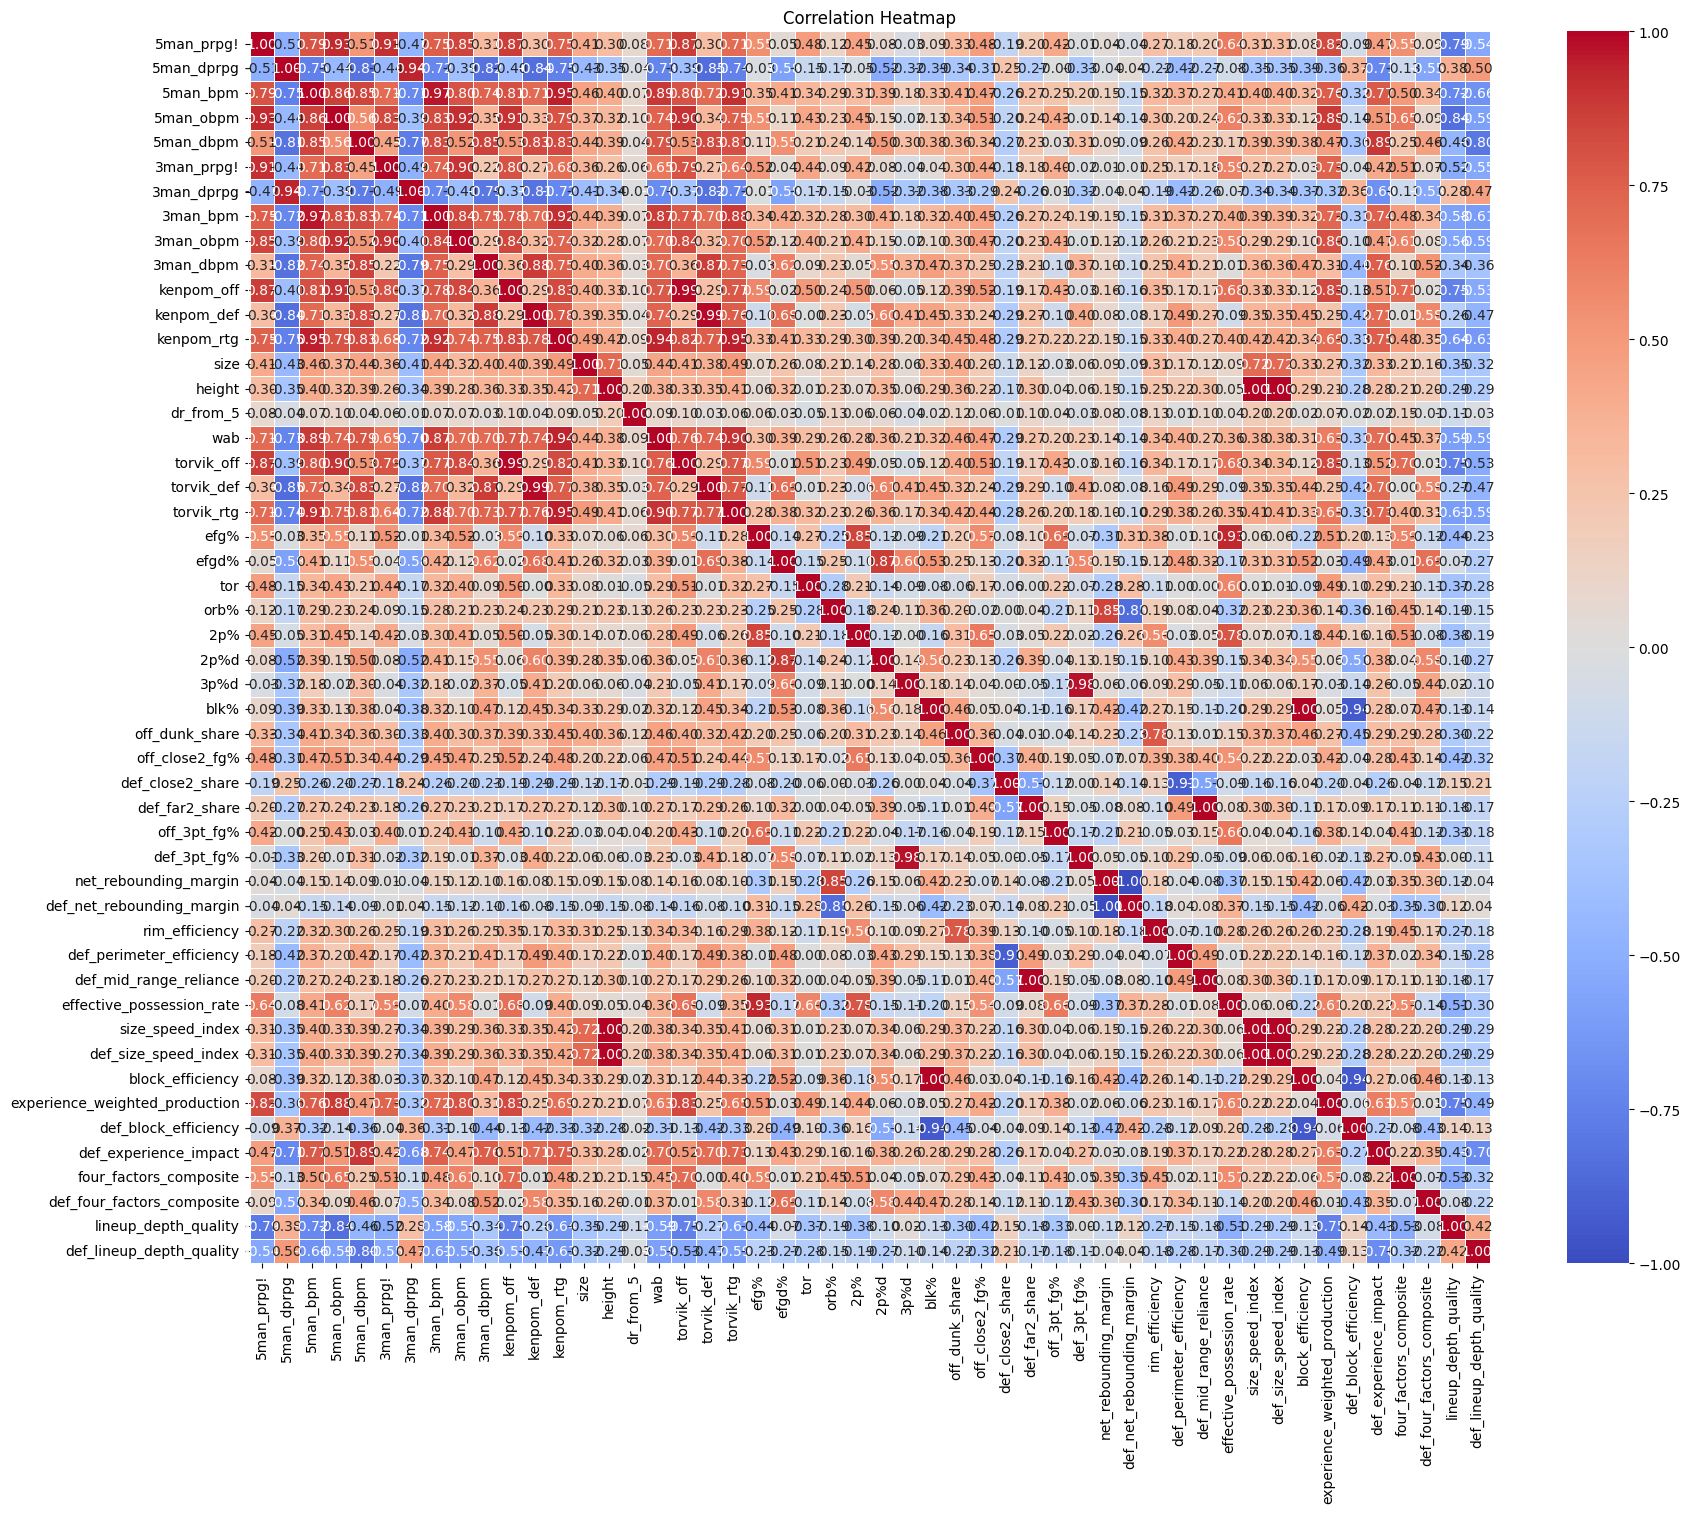

In [11]:
corr_matrix = vars_df.corr()

plt.figure(figsize=(20, 16))  # Optional: specify the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### II. Build Clustering Model

In [12]:
sc = StandardScaler()
scaled_array = sc.fit_transform(vars_df)
model_df = pd.DataFrame(scaled_array)
model_df.columns = ['5man_prpg!',
 '5man_dprpg',
 '5man_bpm',
 '5man_obpm',
 '5man_dbpm',
 '3man_prpg!',
 '3man_dprpg',
 '3man_bpm',
 '3man_obpm',
 '3man_dbpm',
 'kenpom_off',
 'kenpom_def',
 'kenpom_rtg',
 'size',
 'height',
 'dr_from_5',
 'wab',
 'torvik_off',
 'torvik_def',
 'torvik_rtg',
 'efg%',
 'efgd%',
 'tor',
 'orb%',
 '2p%',
 '2p%d',
 '3p%d',
 'blk%',
 'off_dunk_share',
 'off_close2_fg%',
 'def_close2_share',
 'def_far2_share',
 'off_3pt_fg%',
 'def_3pt_fg%',
 'net_rebounding_margin',
 'def_net_rebounding_margin',
 'rim_efficiency',
 'def_perimeter_efficiency',
 'def_mid_range_reliance',
 'effective_possession_rate',
 'size_speed_index',
 'def_size_speed_index',
 'block_efficiency',
 'experience_weighted_production',
 'def_block_efficiency',
 'def_experience_impact',
 'four_factors_composite',
 'def_four_factors_composite',
 'lineup_depth_quality',
 'def_lineup_depth_quality']
model_df.head()

,5man_prpg!,5man_dprpg,5man_bpm,5man_obpm,5man_dbpm,3man_prpg!,3man_dprpg,3man_bpm,3man_obpm,3man_dbpm,...,size_speed_index,def_size_speed_index,block_efficiency,experience_weighted_production,def_block_efficiency,def_experience_impact,four_factors_composite,def_four_factors_composite,lineup_depth_quality,def_lineup_depth_quality
0,1.8411,-1.1241,1.7453,2.0039,0.6561,2.1936,-1.2782,1.4274,1.8732,0.1800,...,1.7471,1.7471,-0.5785,0.3057,0.3373,-0.2947,2.7736,1.2695,-1.6421,-0.9614
1,0.2594,-1.6814,2.3964,1.2891,2.4002,-0.2159,-1.5478,2.3805,0.8689,3.1662,...,4.2537,4.2537,2.6494,-0.5148,-1.5830,-0.0311,2.2206,3.7080,-1.5214,-0.6160
2,0.8144,-0.8803,1.4485,1.5179,0.7090,0.7078,-1.3321,1.1097,1.2400,0.4243,...,-0.9974,-0.9974,0.9088,1.2672,-0.8764,0.6077,0.4787,-0.6542,-1.4912,-0.7730
3,3.0342,-1.9600,2.3868,2.9331,1.6603,2.8763,-2.0331,2.6377,3.0959,0.8587,...,2.7861,2.7861,-0.5586,2.9914,0.3136,1.8270,1.6607,0.5495,-1.9139,-1.9663
4,0.4537,-2.3083,1.5538,0.7030,1.8717,0.1455,-2.2488,1.7905,0.6942,2.3247,...,1.9992,1.9992,-0.1939,0.1413,-0.0732,1.0367,2.1377,0.1625,-0.5249,-0.6474


In [13]:
wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", algorithm="lloyd",
                    max_iter = 500, n_init = 10, random_state = 123)
    kmeans.fit(model_df)
    wcss.append(kmeans.inertia_)

fig = go.Figure(data = go.Scatter(x = [2,3,4,5,6,7,8,9,10], y = wcss))


fig.update_layout(title='WCSS vs. Cluster number',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show()

In [14]:
# Fit K-Means Clustering Mode
kmeans8 = KMeans(n_clusters=8, init='k-means++', algorithm='lloyd',
                 max_iter=500, random_state=123)
kmeans8.fit_predict(model_df)
df['cluster'] = kmeans8.labels_

In [15]:
pd.crosstab(index=df['finish'], columns=df['cluster'])

cluster,0,1,2,3,4,5,6,7
finish,,,,,,,,
Champion,0,0,0,0,0,10,0,0
Covid,11,12,19,4,5,3,3,11
Elite Eight,0,6,1,1,9,15,4,1
Final Four,0,3,2,0,5,5,3,2
First Round,86,45,65,56,8,11,49,42
Runner Up,0,1,1,0,2,5,0,1
Second Round,9,35,34,2,17,18,34,12
Sweet 16,1,8,12,0,18,26,11,4


In [16]:
df[df['finish']=='Champion']

,Unnamed: 0,team_id,year,team,region,seed,finish,weekend,conference,kenpom_id,...,def_block_efficiency,def_experience_impact,four_factors_composite,def_four_factors_composite,elite_outcome_probability,shooting_variance_resilience,lineup_depth_quality,def_lineup_depth_quality,offense_defense_balance,cluster
0,0,2015 Duke,2015,Duke,South,1,Champion,3,ACC,2015 Duke,...,10.2910,13.3560,57.0700,43.0000,4,67.5202,-6.8000,-6.3000,9.3273,5
68,68,2016 Villanova,2016,Villanova,South,2,Champion,3,Big East,2016 Villanova,...,9.6073,29.9250,53.4850,42.6100,1,68.9250,-6.6000,-7.7000,8.4083,5
136,136,2017 North Carolina,2017,North Carolina,South,1,Champion,3,ACC,2017 North Carolina,...,9.9878,27.3130,55.1850,40.5850,1,68.1631,-5.8000,-7.7000,9.0235,5
204,204,2018 Villanova,2018,Villanova,East,1,Champion,3,Big East,2018 Villanova,...,9.0089,17.1570,55.2800,41.4600,3,73.5903,-7.2000,-5.8000,9.7454,5
272,272,2019 Virginia,2019,Virginia,South,1,Champion,3,ACC,2019 Virginia,...,7.4465,32.3200,54.1500,43.0450,3,70.5291,-0.5000,-11.5000,8.5248,5
340,340,2021 Baylor,2021,Baylor,South,1,Champion,3,Big 12,2021 Baylor,...,8.7370,22.5120,55.1500,42.9350,4,73.4947,-1.6000,-3.6000,9.1033,5
408,408,2022 Kansas,2022,Kansas,Midwest,1,Champion,3,Big 12,2022 Kansas,...,8.7801,26.4600,53.7900,42.4500,0,69.0772,-5.0000,-5.5000,8.7520,5
476,476,2023 Connecticut,2023,Connecticut,West,4,Champion,3,Big East,2023 Connecticut,...,7.1080,25.5780,54.2250,41.0850,1,69.3208,-5.6000,-8.7000,8.7748,5
544,544,2024 Connecticut,2024,Connecticut,East,1,Champion,3,Big East,2024 Connecticut,...,6.4573,47.4057,56.4100,41.4950,3,69.6004,-9.1000,-8.3000,9.4889,5
696,696,2025 Florida,2025,Florida,West,1,Champion,3,SEC,2025 Florida,...,7.4303,46.8607,55.7600,41.9400,3,69.0637,-6.2000,-9.3000,9.4557,5


In [17]:
df['kenpom_rtg_rank'] = df.groupby('year')['kenpom_rtg'].rank(method='min', ascending=False)

In [52]:
# Label Tiers
df['tier'] = ''

### S Tier ###
df.loc[(df['cluster']==5) & (df['kenpom_rtg_rank']<=6), 'tier'] = 'S'

### A Tier ###
df.loc[(df['cluster']==7) & (df['kenpom_rtg_rank']<=13), 'tier'] = 'A'
df.loc[(df['cluster']==5) & (df['kenpom_rtg_rank']>6) & (df['kenpom_rtg_rank']<=12), 'tier'] = 'A'
df.loc[(df['cluster']==4) & (df['kenpom_rtg_rank']<=10), 'tier'] = 'A'

### B Tier ###
df.loc[(df['cluster']==7) & (df['kenpom_rtg_rank']>13) & (df['kenpom_rtg_rank']<=26), 'tier'] = 'B'
df.loc[(df['cluster']==6) & (df['kenpom_rtg_rank']<=13), 'tier'] = 'B'
df.loc[(df['cluster']==4) & (df['kenpom_rtg_rank']>10), 'tier'] = 'B'
df.loc[(df['cluster']==2) & (df['kenpom_rtg_rank']<=18), 'tier'] = 'B'
df.loc[(df['cluster']==1) & (df['kenpom_rtg_rank']<=24), 'tier'] = 'B'

### C Tier ###
df.loc[(df['cluster']==7) & (df['kenpom_rtg_rank']>26) & (df['kenpom_rtg_rank']<=37), 'tier'] = 'C'
df.loc[(df['cluster']==6) & (df['kenpom_rtg_rank']>13) & (df['kenpom_rtg_rank']<=38), 'tier'] = 'C'
df.loc[(df['cluster']==5) & (df['kenpom_rtg_rank']>12), 'tier'] = 'C'
df.loc[(df['cluster']==2) & (df['kenpom_rtg_rank']>18) & (df['kenpom_rtg_rank']<=39), 'tier'] = 'C'
df.loc[(df['cluster']==1) & (df['kenpom_rtg_rank']>24) & (df['kenpom_rtg_rank']<=45), 'tier'] = 'C'

### D Tier ###
df.loc[(df['cluster']==7) & (df['kenpom_rtg_rank']>37), 'tier'] = 'D'
df.loc[(df['cluster']==6) & (df['kenpom_rtg_rank']>38), 'tier'] = 'D'
df.loc[(df['cluster']==2) & (df['kenpom_rtg_rank']>39), 'tier'] = 'D'
df.loc[(df['cluster']==1) & (df['kenpom_rtg_rank']>45), 'tier'] = 'D'

### F Tier ###
df.loc[(df['cluster']==0), 'tier'] = 'F'
df.loc[(df['cluster']==3), 'tier'] = 'F'

In [53]:
pd.crosstab(index=df['finish'], columns=df['tier'])

tier,A,B,C,D,F,S
finish,,,,,,
Champion,0,0,0,0,0,10
Covid,8,10,19,14,15,2
Elite Eight,15,7,4,2,1,8
Final Four,6,6,6,0,0,2
First Round,7,25,102,84,142,2
Runner Up,3,1,1,0,0,5
Second Round,12,33,67,33,11,5
Sweet 16,20,19,32,3,1,5
